In [1]:
%load_ext autoreload

In [2]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('../../analysis')))
from xa.proc.exp import Experiment

x = Experiment(
    name="Asymmetric Run 1h",
    i1='1',
    i2='2',
    i3='3',
    # ... add more iterations here
)

In [3]:
import pandas as pd
import numpy as np

# (un)comment for selecting display precision for floats
pd.options.display.float_format = None # reset
pd.options.display.float_format = np.format_float_positional # dynamic
pd.options.display.float_format = "{:.3f}".format # fixed

# N = number of elements
# numpy.std is biased, divides by N (population), ddof by default is 0
# pandas.std is unbiased, divides by N-1 (sample), ddof by default is 1

x.stats

count   mean  std bias  std unbias   min   25%  \
iter stat                                                                      
i1   cpu usage            10887.000  1.969     2.501       2.501 0.004 0.363   
     memory usage         10887.000  0.777     0.872       0.872 0.031 0.217   
     request latency       3600.000  0.007     0.126       0.126 0.002 0.005   
     request throughput    3600.000 10.561     3.231       3.232 1.120 9.075   
     response time      1535673.000  4.275     7.199       7.199 0.000 0.000   
i2   cpu usage            10888.000  2.505     3.627       3.627 0.004 0.364   
     memory usage         10888.000  0.774     0.878       0.878 0.030 0.164   
     request latency       3600.000  0.007     0.126       0.126 0.002 0.005   
     request throughput    3600.000 10.560     3.229       3.229 1.121 9.072   
     response time      1543763.000  4.257     7.268       7.268 0.000 0.000   
i3   cpu usage            10892.000  2.243     3.002       3.002 0.004 0.359   
     memory usage         10892.000  0.773     0.869       0.869 0.031 0.174   
     request latency       3600.000  0.007     0.126       0.126 0.002 0.005   
     request throughput    3600.000 10.558     3.226       3.227 1.121 9.074   
     response time      1543384.000  4.259     7.269       7.269 0.000 0.000   

                          50%    75%     max  ci 95% -  ci 95% +  ci 99% -  \
iter stat                                                                    
i1   cpu usage          0.661  2.599  13.701     1.922     2.016     1.907   
     memory usage       0.360  1.217   5.272     0.760     0.793     0.755   
     request latency    0.005  0.006   7.588     0.003     0.011     0.002   
     request throughput 9.115 11.038  22.918    10.456    10.667    10.423   
     response time      0.000 15.103 524.119     4.263     4.286     4.260   
i2   cpu usage          0.786  2.960  28.807     2.437     2.573     2.415   
     memory usage       0.363  1.186   5.290     0.757     0.790     0.752   
     request latency    0.005  0.006   7.585     0.003     0.011     0.002   
     request throughput 9.114 11.036  22.947    10.454    10.665    10.421   
     response time      0.000 15.103 311.300     4.246     4.269     4.242   
i3   cpu usage          0.730  2.804  19.709     2.187     2.300     2.169   
     memory usage       0.346  1.211   5.281     0.757     0.789     0.752   
     request latency    0.005  0.006   7.586     0.003     0.011     0.002   
     request throughput 9.114 11.036  22.923    10.453    10.664    10.420   
     response time      0.000 15.103 315.872     4.248     4.271     4.244   

                         ci 99% +  
iter stat                          
i1   cpu usage              2.031  
     memory usage           0.798  
     request latency        0.013  
     request throughput    10.700  
     response time          4.290  
i2   cpu usage              2.594  
     memory usage           0.795  
     request latency        0.013  
     request throughput    10.698  
     response time          4.272  
i3   cpu usage              2.317  
     memory usage           0.794  
     request latency        0.013  
     request throughput    10.697  
     response time          4.274

In [4]:
x.summary

,mean of means,std of means bias,std of means unbias
cpu usage,2.239,0.219,0.268
response time,4.264,0.008,0.010
memory usage,0.774,0.002,0.002
request throughput,10.560,0.001,0.001
request latency,0.007,0.000,0.000


In [5]:
%autoreload 2
from xa.draw.plot import Figure, Pairwise

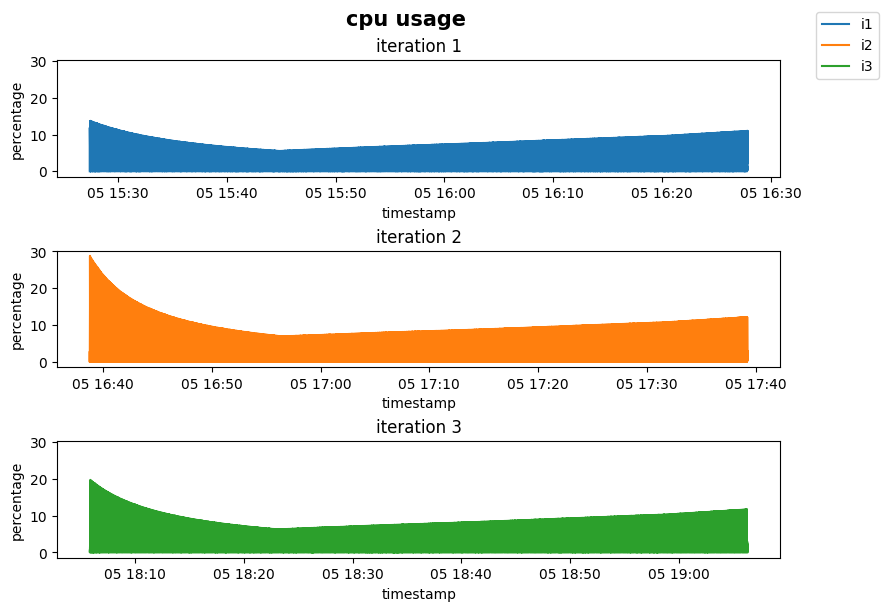

In [6]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.cpu.usage.TS, y=x.i1.metric.cpu.usage.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i2.metric.cpu.usage.TS, y=x.i2.metric.cpu.usage.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i3.metric.cpu.usage.TS, y=x.i3.metric.cpu.usage.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='percentage'),
    title='cpu usage', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

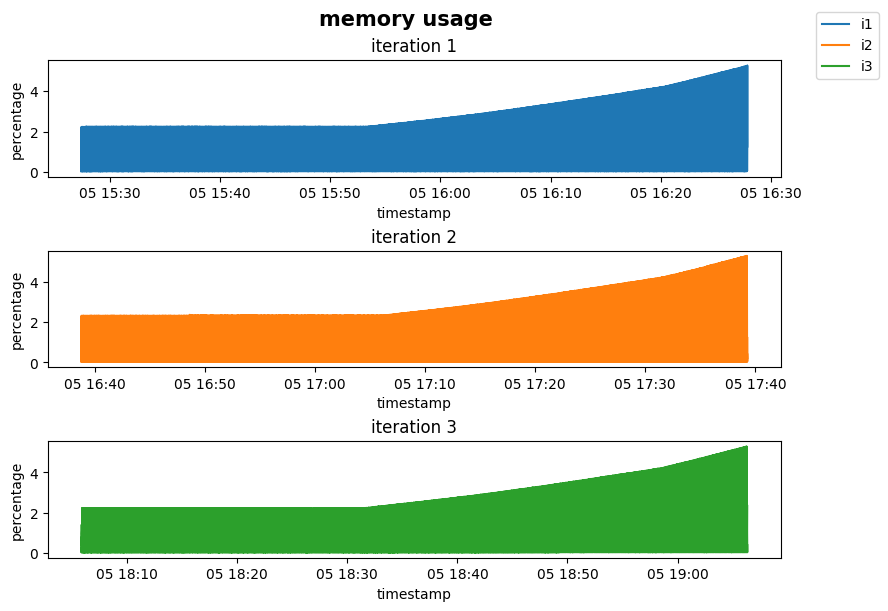

In [7]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.memory.usage.TS, y=x.i1.metric.memory.usage.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i2.metric.memory.usage.TS, y=x.i2.metric.memory.usage.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='percentage'),
    Pairwise(x=x.i3.metric.memory.usage.TS, y=x.i3.metric.memory.usage.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='percentage'),
    title='memory usage', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

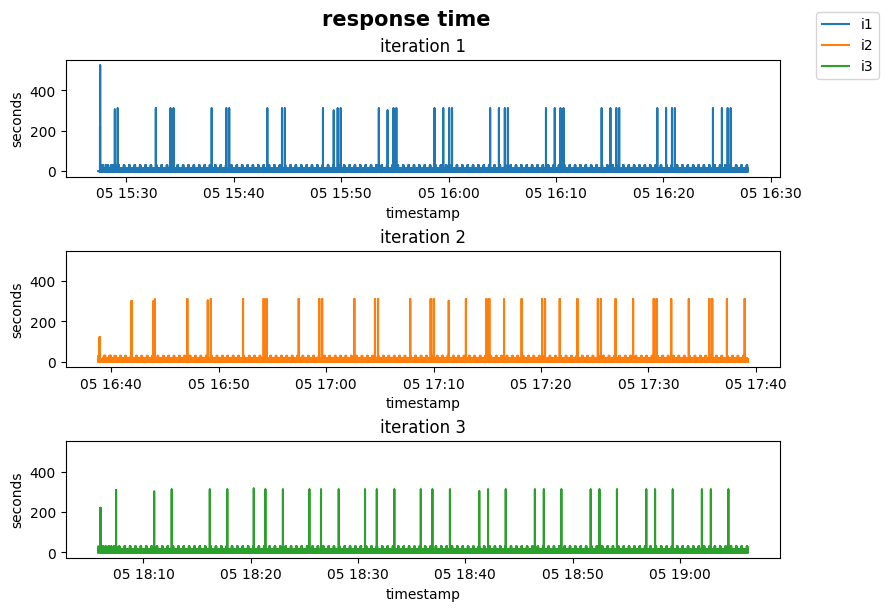

In [8]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.response.time.TS, y=x.i1.metric.response.time.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i2.metric.response.time.TS, y=x.i2.metric.response.time.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i3.metric.response.time.TS, y=x.i3.metric.response.time.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='seconds'),
    title='response time', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

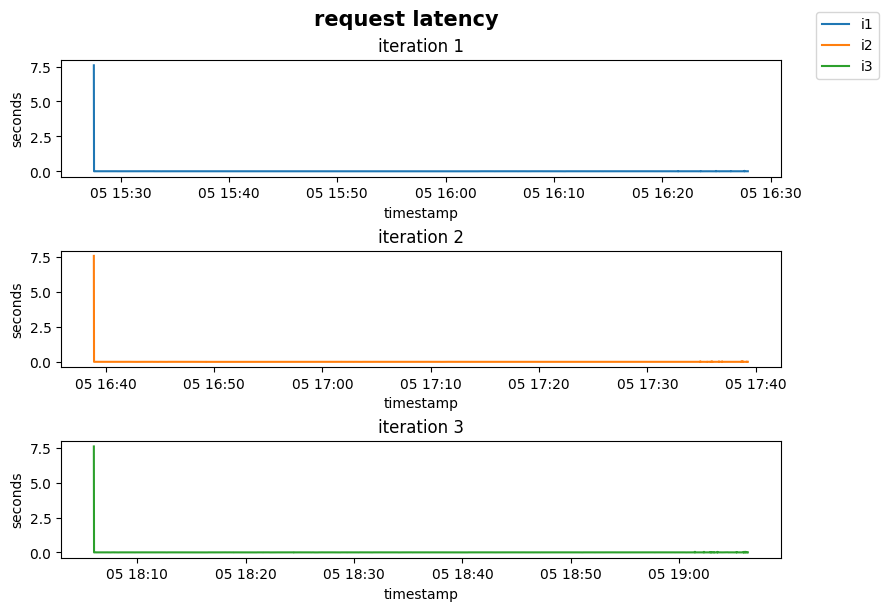

In [9]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.request.latency.TS, y=x.i1.metric.request.latency.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i2.metric.request.latency.TS, y=x.i2.metric.request.latency.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='seconds'),
    Pairwise(x=x.i3.metric.request.latency.TS, y=x.i3.metric.request.latency.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='seconds'),
    title='request latency', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig

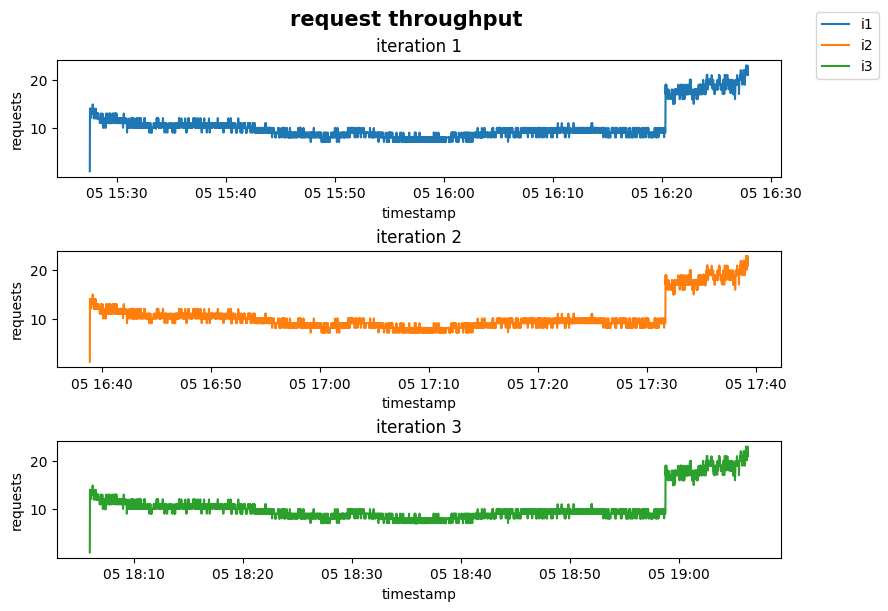

In [10]:
Figure(1, # ncols
    Pairwise(x=x.i1.metric.request.throughput.TS, y=x.i1.metric.request.throughput.V, label='i1', title='iteration 1', xlabel='timestamp', ylabel='requests'),
    Pairwise(x=x.i2.metric.request.throughput.TS, y=x.i2.metric.request.throughput.V, label='i2', title='iteration 2', xlabel='timestamp', ylabel='requests'),
    Pairwise(x=x.i3.metric.request.throughput.TS, y=x.i3.metric.request.throughput.V, label='i3', title='iteration 3', xlabel='timestamp', ylabel='requests'),
    title='request throughput', title_props=dict(fontsize=15, fontweight='bold'),
    subplots_props=dict(layout='constrained', figsize=(8,6), sharey=True),
    legend_props=dict(loc='upper right', bbox_to_anchor=(1.1, 1)),
).fig